## Stock Market Sentiment Analyzer

### **Project Overview**
This project aims to analyze sentiment in stock market-related tweets using Natural Language Processing (NLP). By leveraging **Hugging Face's FinBERT model**, we classify tweets as **positive, negative, or neutral** and explore how sentiment correlates with stock markettrends. 

In [32]:
# Important Necessary Libraries
import pandas as pd
import yfinance as yf 
import requests 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [33]:
from datasets import load_dataset

# Load datasets 
dataset = load_dataset ("StephanAkkerman/stock-market-tweets-data")

print(dataset['train'][:5])

{'id': [1, 2, 3, 4, 5], 'created_at': ['2020-04-09 23:59:51+00:00', '2020-04-09 23:58:55+00:00', '2020-04-09 23:58:52+00:00', '2020-04-09 23:58:27+00:00', '2020-04-09 23:57:59+00:00'], 'text': ["@KennyDegu very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.", '#ES_F achieved Target 2780 closing above 50% #Fibonacci  level, momentum still up. possible push towards 2842-2886 next week. $SPX $SPY  #tradign #futures https://t.co/wD2A0102nC', 'RT @KimbleCharting: Silver/Gold indicator creates one of the largest bullish reversal patterns in decades while testing multi-decade suppor…', '@Issaquahfunds Hedged our $MSFT position into close. Seemed to be getting lazy over this past week.', "RT @zipillinois: 3 Surprisingly Controversial Stocks in Donald Trump's Portfolio @themotleyfool #stocks $GILD $MO https://t.co/d9hlJnSRN3"]}


### Cleaning Step 

In [34]:
# Hugging Face Transformers for Sentiment Analysis
from transformers import pipeline

# Load FinBERT model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use mps:0


In [35]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URL
    text = re.sub(r'@\w+', '', text)    # Remove mentions @user 
    text = re.sub(r'#\w+','', text)     # Remove hashtags
    text = re.sub(r'#[A-Za-z0-9] +', ' ', text) # Remove special characters 
    text = re.sub(r'[^\w\s$]','', text) # Keep words, numbers, and "$" (for stocks)
    return text.strip()

cleaned_sentiments = []
for i in range(5):
    cleaned_text = clean_text(dataset['train'][i]['text'])
    cleaned_result = sentiment_pipeline(cleaned_text)
    cleaned_sentiments.append(cleaned_result[0]['label'])

In [36]:
original_sentiments = []

for i in range(5): 
    text = dataset['train'][i]['text']
    original_result = sentiment_pipeline(text)
    original_sentiments.append(original_result[0]['label'])

In [37]:
# Create DataFrames for comparison 
df_comparison = pd.DataFrame({'Original': original_sentiments, 'Cleaned': cleaned_sentiments})
print(df_comparison.head(10)) # Check the first 10 rows

   Original   Cleaned
0   neutral   neutral
1  positive  positive
2  positive  positive
3  negative  negative
4   neutral   neutral


/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_53774/1696791064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_comparison, x='Change', palette = 'coolwarm')


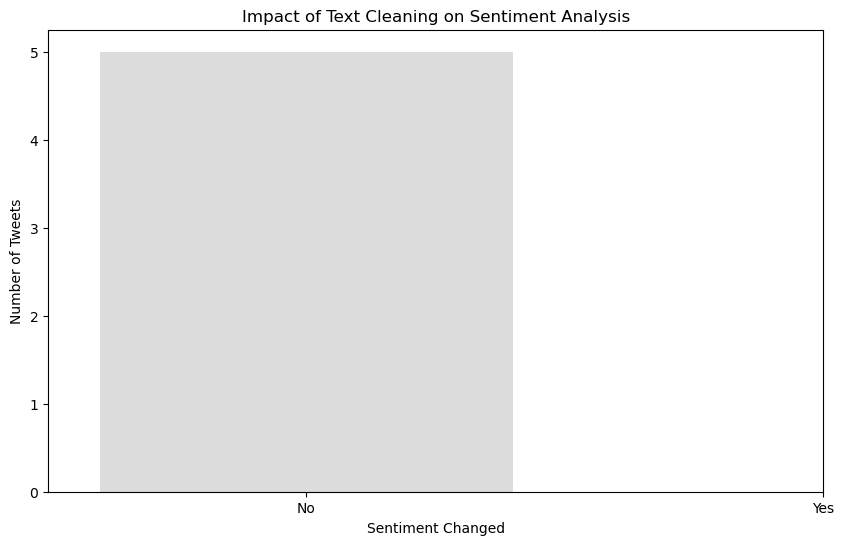

In [40]:
# Count how many tweets changes sentiment 
df_comparison['Change'] = df_comparison['Original'] != df_comparison['Cleaned']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_comparison, x='Change', palette = 'coolwarm')
plt.title('Impact of Text Cleaning on Sentiment Analysis')
plt.xlabel('Sentiment Changed')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [38]:
text = dataset['train'][0]['text']
result = sentiment_pipeline(text)
print(result)

[{'label': 'neutral', 'score': 0.536605179309845}]


/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_53774/292476947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')


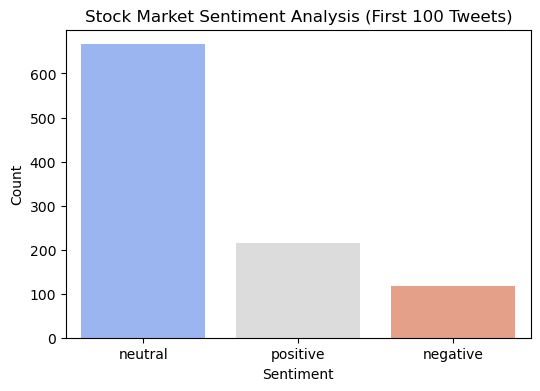

In [39]:
# Collect sentiment results for 100 tweets 
sentiments = []
for i in range(1000): 
    text = clean_text(dataset['train'][i]['text'])
    result = sentiment_pipeline(text)
    sentiments.append(result[0]['label'])

# Convert to DataFrame 
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment'])

plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')
plt.title("Stock Market Sentiment Analysis (First 100 Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Expected Insights:**
- If **positive tweets dominates**, it may indicate **bullis**h** market sentiment. 
- If **positive tweets dominates**, it may suggest a **bearish** trend. 
- A **neutral balance** indicates mixed sentiment, suggesting uncertainty. 

## Conclusion 
This project demonstrates how **NLP can be used to analyze stock market sentiment**. By leveraging **Hugging Face's FinBERT**, I:
- Successfully **classified finantial tweets**, into positive, negative, and neutral. 
- Visualized **how senttiment is distributed**.
- Laid the groundwork for future applications, such as **correlating sentiment with actual stock prices**.